# task 2

## Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
data = pd.read_csv('Titanic dataset.csv')

## 1. Data Cleaning

## Check for missing values

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Fill missing values

common approaches include using the mean or median.Median is often preferred over mean when there are outliers (extremely high or low values) in the data. Since age might have extreme values . The "Embarked" column represents a categorical variable (the port where passengers embarked: 'C', 'Q', 'S').If most passengers boarded at port 'S', replacing missing values with 'S' makes the dataset more representative of the actual distribution.

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [10]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Checking for duplicate values in the dataset

In [12]:
data.duplicated().sum()

np.int64(0)

## Dropping unnecessary columns

In [15]:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

axis=1 specifies that you are dropping columns.

## data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

Each categorical value is now represented as its own column, with a 1 indicating the presence of that category for a particular row and 0 indicating its absence.

In [17]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

## 2/Exploratory Data Analysis (EDA)

###### *Understanding the Structure of the Data:
###### -Describe the Dataset
###### -Value Counts: Check the distribution of categorical variables 
###### *Univariate Analysis:Single Variable Analysis: Analyze each variable independently.
###### -Numerical Variables: Use histograms, box plots, or density plots to explore distributions (e.g., distribution of "Age").
###### -Categorical Variables: Use bar charts or pie charts to explore the distribution (e.g., distribution of "Sex" or "Pclass").
###### *Bivariate Analysis:Relationships Between Two Variables: Analyze how two variables are related.
###### -Numerical vs. Categorical: Use box plots or violin plots 
###### -Categorical vs. Categorical: Use heatmaps or stacked bar plots 
###### -Numerical vs. Numerical: Use scatter plots or correlation heatmaps
###### Identify correlations (e.g., a correlation matrix can show relationships between numerical variables like "Fare" and "Age")

## Get summary statistics

In [18]:
print(data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Checking the survival of people

In [19]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Histogram of 'Age'

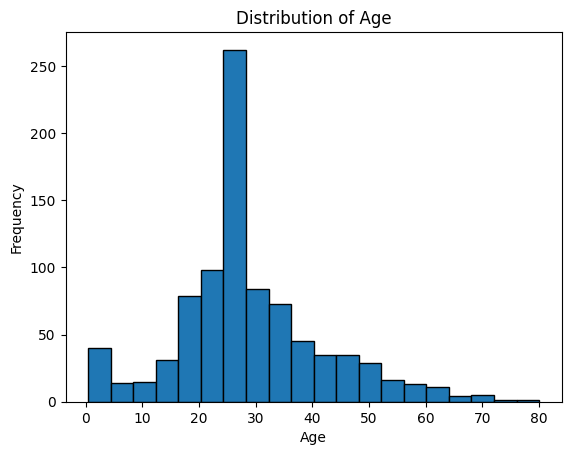

In [20]:
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## Survival rate by class

In [21]:
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


interpretation ; About 62.96% of 1st class passengers survived. note ; .mean(): calculates the mean (average) of the 'Survived' column for each passenger class.

## Pair plot to visualize relationships

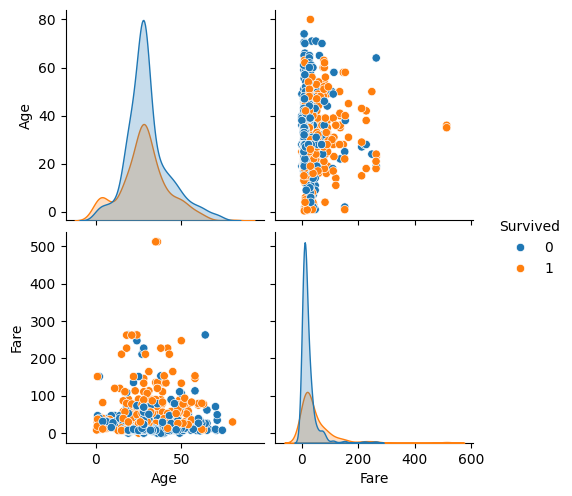

In [22]:
sns.pairplot(data[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()

###### This code generates a pair plot, which consists of multiple scatter plots (and possibly histograms or density plots on the diagonals) showing the relationships between Age, Fare, and Survived.The scatter plots show how Age and Fare are related, with different colors indicating survival status.
###### note : The hue parameter colors the points based on the values of the 'Survived' column. This helps in understanding how the relationships between Age and Fare are different for passengers who survived versus those who did not.

## Scatter plot for 'Age' vs 'Fare'

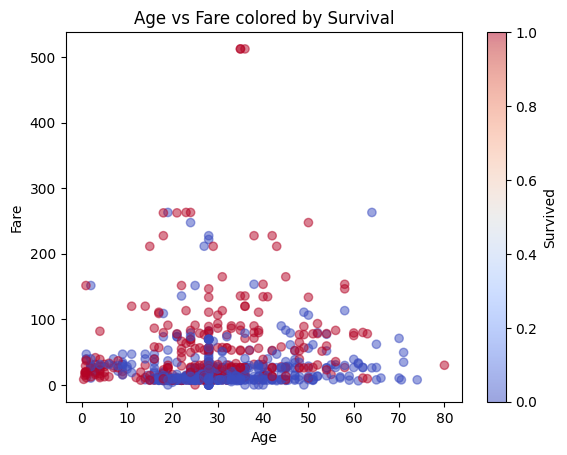

In [24]:
plt.scatter(data['Age'], data['Fare'], c=data['Survived'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare colored by Survival')
plt.colorbar(label='Survived')
plt.show()

###### c=data['Survived']:This parameter specifies the color of each point in the scatter plot. The color is determined by the values in the 'Survived' column of the DataFrame
###### cmap stands for "colormap." It specifies the color scheme used to map the values of c
###### the alpha parameter controls the transparency of the points in the scatter plot